In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Suicide_Detection.csv")
# Preview data
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
# Balance classes (take equal number of suicide and non-suicide posts)
suicide = df[df['class'] == 'suicide'].head(30000)
non_suicide = df[df['class'] == 'non-suicide'].head(30000)
df_balanced = pd.concat([suicide, non_suicide]).reset_index(drop=True)

# Map class labels to numbers
label_map = {'suicide': 1, 'non-suicide': 0}
df_balanced['label'] = df_balanced['class'].map(label_map)

# Check data distribution
df_balanced['class'].value_counts()


,count
class,
suicide,30000
non-suicide,30000


In [ ]:
# Convert text to string
texts = df_balanced['text'].astype(str)
labels = df_balanced['label'].values

# Tokenization
tokenizer = Tokenizer(num_words=30000, lower=True)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences to ensure equal length
X = pad_sequences(sequences, maxlen=150, padding='post')


In [ ]:
# Splitting dataset into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Bidirectional

# GRU Model Architecture
model_gru = Sequential([
    Embedding(input_dim=30000, output_dim=100, input_length=150),  # Embedding layer
    Bidirectional(GRU(128, return_sequences=True)),  # First GRU Layer (Bidirectional)
    Dropout(0.3),  # Dropout to prevent overfitting
    Bidirectional(GRU(64)),  # Second GRU Layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile Model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model_gru.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.8487 - loss: 0.3418 - val_accuracy: 0.9220 - val_loss: 0.2159
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9431 - loss: 0.1616 - val_accuracy: 0.9275 - val_loss: 0.1931
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9633 - loss: 0.1088 - val_accuracy: 0.9274 - val_loss: 0.2134
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9710 - loss: 0.0852 - val_accuracy: 0.9241 - val_loss: 0.2323
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9795 - loss: 0.0614 - val_accuracy: 0.9204 - val_loss: 0.2499
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9872 - loss: 0.0416 - val_accuracy: 0.9093 - val_loss: 0.3109
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.9174 - val_loss: 0.3538
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9929 - loss: 0.0233 - 

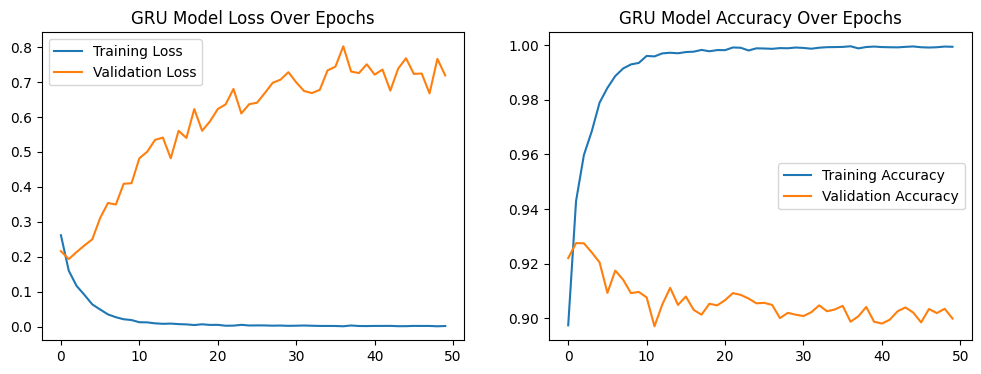

In [ ]:
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('GRU Model Loss Over Epochs')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('GRU Model Accuracy Over Epochs')

plt.show()


In [ ]:
# Predict on test data
y_pred_gru = model_gru.predict(X_test)
y_pred_classes_gru = (y_pred_gru > 0.5).astype("int32")  # Convert probabilities to binary values

# Print classification report
print("GRU Classification Report:\n")
print(classification_report(y_test, y_pred_classes_gru, target_names=['non-suicide', 'suicide']))


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
GRU Classification Report:

              precision    recall  f1-score   support

 non-suicide       0.89      0.91      0.90      6091
     suicide       0.91      0.89      0.90      5909

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

